<a href="https://colab.research.google.com/github/dhavalats/dhavala/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Overview:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26   

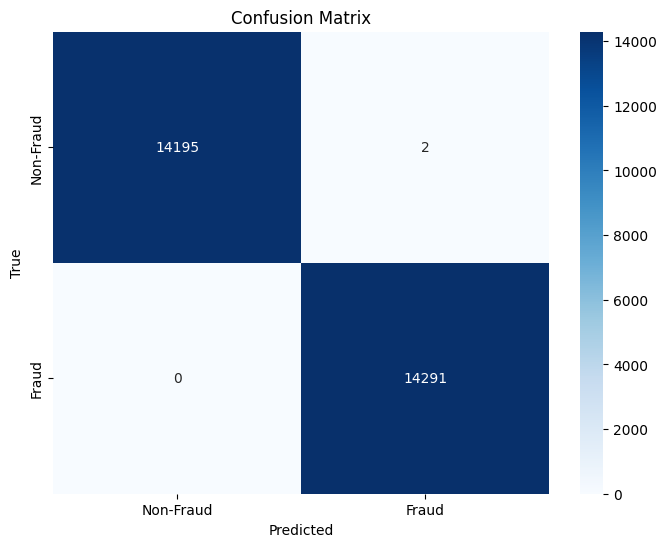

In [3]:
# Install necessary packages
!pip install -U scikit-learn pandas matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

# Load the dataset (assuming the file is already uploaded and its name is 'creditcard.csv')
filename = 'creditcard.csv'  # Change this if your file name is different
data = pd.read_csv(filename)

# Explore the dataset
print("Dataset Overview:")
print(data.head())
print("\nData Information:")
print(data.info())
print("\nData Description:")
print(data.describe())

# Check for class distribution
print("\nClass Distribution:")
print(data['Class'].value_counts())

# Preprocess the data
# Drop columns that are not needed
data = data.drop(['Time'], axis=1)

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('Class', axis=1))

# Create a DataFrame with scaled features
scaled_data = pd.DataFrame(scaled_features, columns=data.columns[:-1])
scaled_data['Class'] = data['Class'].values

# Handle imbalanced data
majority = scaled_data[scaled_data['Class'] == 0]
minority = scaled_data[scaled_data['Class'] == 1]

# Upsample minority class
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
data_upsampled = pd.concat([majority, minority_upsampled])

# Split the data
X = data_upsampled.drop('Class', axis=1)
y = data_upsampled['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
print("\nLogistic Regression:")
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Random Forest
print("\nRandom Forest:")
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Isolation Forest for anomaly detection
print("\nIsolation Forest:")
iso_forest = IsolationForest(contamination=0.01, random_state=42)
y_pred_iso = iso_forest.fit_predict(X_test)

# Convert predictions to binary format
y_pred_iso_binary = [1 if p == 1 else 0 for p in y_pred_iso]

print(confusion_matrix(y_test, y_pred_iso_binary))
print(classification_report(y_test, y_pred_iso_binary))

# Plot confusion matrix for Random Forest
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm_rf, ['Non-Fraud', 'Fraud'])
